# В этом вебинаре мы продолжим знакомство с языком программирования Python и его библиотеками для анализа данных. Мы рассмотрим следующие темы:

Уход от циклов и векторизованные вычисления
Сортировка массивов
Использование Pandas для работы с табличными данными
Чтение и запись табличных данных в файловую систему
Работа с индексами
Фильтрация значений и подготовка данных для анализа
Применение функций Pandas к столбцам и строкам таблицы
Визуализация данных
Сводные таблицы
Изменение формы и объединение таблиц
Работа с Excel-файлами в Pandas
Работа с DataFrame
Работа с джойнами и объединение в единую витрину данных

## Давайте подробно рассмотрим каждую из этих тем с примерами кода.


### Уход от циклов и векторизованные вычисления

Векторизация – это процесс замены явных циклов (например, for и while) на векторные операции, которые более эффективны благодаря использованию оптимизированных низкоуровневых библиотек.

Пример 1: Сложение двух списков

Без векторизации (с использованием цикла):


In [1]:
import time

list_a = list(range(1, 1000001))
list_b = list(range(1, 1000001))
list_c = []

start_time = time.time()

for i in range(len(list_a)):
    list_c.append(list_a[i] + list_b[i])

print("Время выполнения без векторизации:", time.time() - start_time)

Время выполнения без векторизации: 0.07098388671875


In [2]:
import numpy as np
import time

array_a = np.arange(1, 1000001)
array_b = np.arange(1, 1000001)

start_time = time.time()

array_c = array_a + array_b

print("Время выполнения с векторизацией:", time.time() - start_time)

Время выполнения с векторизацией: 0.0010008811950683594


## Пример 2: Вычисление экспоненты для каждого элемента массива

Без векторизации:

In [3]:
import math
import time

list_numbers = list(range(1, 100))
result = []

start_time = time.time()

for num in list_numbers:
    result.append(math.exp(num))

print("Время выполнения без векторизации:", time.time() - start_time)

Время выполнения без векторизации: 9.799003601074219e-05


С векторизацией:

In [4]:
import numpy as np
import time

array_numbers = np.arange(1, 100)

start_time = time.time()

result = np.exp(array_numbers)

print("Время выполнения с векторизацией:", time.time() - start_time)

Время выполнения с векторизацией: 0.00023508071899414062


## Сортировка массивов

Сортировка данных – важная операция при обработке массивов и таблиц.

### Пример 1: Сортировка numpy массива

In [6]:
import numpy as np

array = np.random.randint(1, 100, size=10)
print("Исходный массив:", array)

sorted_array = np.sort(array)
print("Отсортированный массив:", sorted_array)

Исходный массив: [ 6 22 38 36 85 23 72  7 85 55]
Отсортированный массив: [ 6  7 22 23 36 38 55 72 85 85]


### Пример 2: Сортировка двумерного массива по определенному столбцу

In [7]:
import numpy as np

array = np.random.randint(1, 100, size=(5, 3))
print("Исходный массив:\n", array)

# Сортировка по столбцу с индексом 1
sorted_array = array[array[:, 1].argsort()]
print("Массив, отсортированный по второму столбцу:\n", sorted_array)

Исходный массив:
 [[82 88 25]
 [47 63 98]
 [26 21 79]
 [15  1 43]
 [42 42 77]]
Массив, отсортированный по второму столбцу:
 [[15  1 43]
 [26 21 79]
 [42 42 77]
 [47 63 98]
 [82 88 25]]


## Использование Pandas для работы с табличными данными

Pandas – мощная библиотека для работы с табличными данными.

Создание DataFrame

In [11]:
import pandas as pd

data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина'],
    'Возраст': [28, 34, 29, 42],
    'Город': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург']
}

df = pd.DataFrame(data)
print(df)

      Имя  Возраст            Город
0    Анна       28           Москва
1   Борис       34  Санкт-Петербург
2  Виктор       29      Новосибирск
3  Галина       42     Екатеринбург


Чтение и запись табличных данных в файловую систему

Pandas поддерживает различные форматы данных.

Чтение CSV файла

In [9]:
df.to_csv('data.csv', index=False)

In [10]:
import pandas as pd

df = pd.read_csv('data.csv')
print(df.head())

      Имя  Возраст            Город
0    Анна       28           Москва
1   Борис       34  Санкт-Петербург
2  Виктор       29      Новосибирск
3  Галина       42     Екатеринбург


Запись DataFrame в CSV файл

df.to_csv('new_data.csv', index=False)


## Работа с индексами

Индексы позволяют обращаться к данным по определенному ключу.

Установка индекса

In [12]:
df2 = df.set_index("Имя")

In [13]:
df2

,Возраст,Город
Имя,,
Анна,28,Москва
Борис,34,Санкт-Петербург
Виктор,29,Новосибирск
Галина,42,Екатеринбург


In [14]:
df

,Имя,Возраст,Город
0,Анна,28,Москва
1,Борис,34,Санкт-Петербург
2,Виктор,29,Новосибирск
3,Галина,42,Екатеринбург


In [15]:
df.set_index('Имя', inplace=True)
print(df)

        Возраст            Город
Имя                             
Анна         28           Москва
Борис        34  Санкт-Петербург
Виктор       29      Новосибирск
Галина       42     Екатеринбург


Сброс индекса

In [16]:
df.reset_index(inplace=True)
print(df)

      Имя  Возраст            Город
0    Анна       28           Москва
1   Борис       34  Санкт-Петербург
2  Виктор       29      Новосибирск
3  Галина       42     Екатеринбург


## Фильтрация значений и подготовка данных для анализа

Фильтрация данных – отбор строк, соответствующих определенным условиям.

Пример: Отбор людей старше 30 лет

In [19]:
filtered_df = df[df['Возраст'] > 30]
print(filtered_df)

      Имя  Возраст            Город
1   Борис       34  Санкт-Петербург
3  Галина       42     Екатеринбург


In [22]:
df['Возраст'] > 30

0    False
1     True
2    False
3     True
Name: Возраст, dtype: bool

### Применение функций Pandas к столбцам и строкам таблицы

Применение функции к столбцу (метод apply)

In [23]:
# Добавим новый столбец с информацией о том, является ли человек совершеннолетним
df['Совершеннолетний'] = df['Возраст'].apply(lambda x: 'Да' if x >= 18 else 'Нет')
print(df)

      Имя  Возраст            Город Совершеннолетний
0    Анна       28           Москва               Да
1   Борис       34  Санкт-Петербург               Да
2  Виктор       29      Новосибирск               Да
3  Галина       42     Екатеринбург               Да


## Визуализация данных

Pandas интегрирован с Matplotlib для построения графиков.

Построение гистограммы распределения возраста


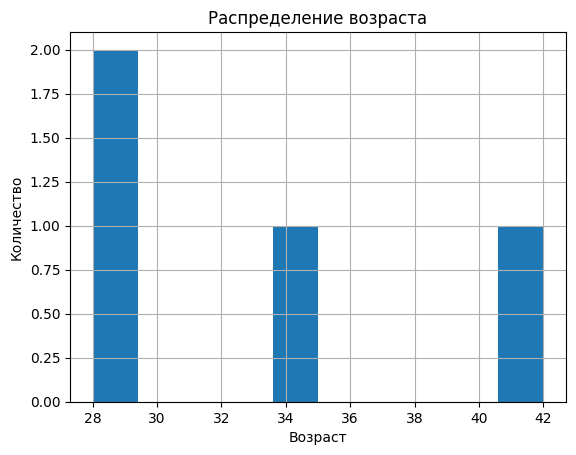

In [24]:
import matplotlib.pyplot as plt

df['Возраст'].hist()
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение возраста')
plt.show()

<Axes: >

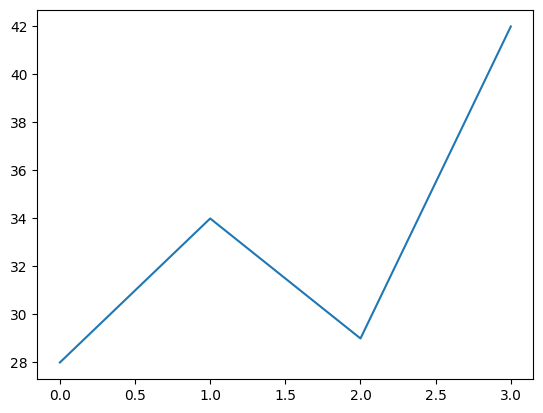

In [25]:
df['Возраст'].plot()

## Сводные таблицы

Сводные таблицы помогают агрегировать данные.

Пример: Средний возраст по городам

In [26]:
pivot_table = df.pivot_table(values='Возраст', index='Город', aggfunc='mean')
print(pivot_table)

                 Возраст
Город                   
Екатеринбург        42.0
Москва              28.0
Новосибирск         29.0
Санкт-Петербург     34.0


## Изменение формы и объединение таблиц

Слияние таблиц (merge)

In [27]:
data_additional = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина'],
    'Профессия': ['Инженер', 'Учитель', 'Врач', 'Юрист']
}

df_additional = pd.DataFrame(data_additional)

df_merged = pd.merge(df, df_additional, on='Имя')
print(df_merged)

      Имя  Возраст            Город Совершеннолетний Профессия
0    Анна       28           Москва               Да   Инженер
1   Борис       34  Санкт-Петербург               Да   Учитель
2  Виктор       29      Новосибирск               Да      Врач
3  Галина       42     Екатеринбург               Да     Юрист


Добавление новых строк (append)

In [39]:
df3 = pd.concat([df, df])

In [40]:
df3

,Имя,Возраст,Город,Совершеннолетний
0,Анна,28,Москва,Да
1,Борис,34,Санкт-Петербург,Да
2,Виктор,29,Новосибирск,Да
3,Галина,42,Екатеринбург,Да
0,Анна,28,Москва,Да
1,Борис,34,Санкт-Петербург,Да
2,Виктор,29,Новосибирск,Да
3,Галина,42,Екатеринбург,Да


In [30]:
new_data = {'Имя': 'Дмитрий', 'Возраст': 35, 'Город': 'Казань', 'Совершеннолетний': 'Да', 'Профессия': 'Программист'}
df_merged.loc[len(df_merged)] = new_data
print(df_merged)

       Имя  Возраст            Город Совершеннолетний    Профессия
0     Анна       28           Москва               Да      Инженер
1    Борис       34  Санкт-Петербург               Да      Учитель
2   Виктор       29      Новосибирск               Да         Врач
3   Галина       42     Екатеринбург               Да        Юрист
4  Дмитрий       35           Казань               Да  Программист
5  Дмитрий       35           Казань               Да  Программист
6  Дмитрий       35           Казань               Да  Программист


In [31]:
df_merged.drop_duplicates()

,Имя,Возраст,Город,Совершеннолетний,Профессия
0,Анна,28,Москва,Да,Инженер
1,Борис,34,Санкт-Петербург,Да,Учитель
2,Виктор,29,Новосибирск,Да,Врач
3,Галина,42,Екатеринбург,Да,Юрист
4,Дмитрий,35,Казань,Да,Программист


## Работа с Excel-файлами в Pandas

Чтение данных из Excel

In [32]:
df_excel = pd.read_excel('data.xlsx', sheet_name='Sheet1')
print(df_excel.head())

       Имя  Возраст            Город Совершеннолетний    Профессия
0     Анна       28           Москва               Да      Инженер
1    Борис       34  Санкт-Петербург               Да      Учитель
2   Виктор       29      Новосибирск               Да         Врач
3   Галина       42     Екатеринбург               Да        Юрист
4  Дмитрий       35           Казань               Да  Программист


Запись данных в Excel

In [33]:
df_merged.to_excel('data.xlsx', index=False)

## Работа с DataFrame

DataFrame – основной объект Pandas для работы с табличными данными.

Основные операции с DataFrame

- Просмотр первых строк: df.head()
- Просмотр последних строк: df.tail()
- Получение информации о данных: df.info()
- Описание статистики: df.describe()


Работа с джойнами и объединение в единую витрину данных

Виды объединений

- Inner Join – пересечение
- Left Join – левое внешнее объединение
- Right Join – правое внешнее объединение
- Outer Join – полное внешнее объединение

Пример: Объединение двух таблиц с использованием Left Join

In [34]:
data_orders = {
    'Заказ ID': [1, 2, 3],
    'Имя клиента': ['Анна', 'Борис', 'Екатерина']
}

data_payments = {
    'Заказ ID': [1, 2],
    'Сумма оплаты': [200, 450]
}

df_orders = pd.DataFrame(data_orders)
df_payments = pd.DataFrame(data_payments)

df_result = pd.merge(df_orders, df_payments, on='Заказ ID', how='left')
print(df_result)

   Заказ ID Имя клиента  Сумма оплаты
0         1        Анна         200.0
1         2       Борис         450.0
2         3   Екатерина           NaN


In [38]:
type(df_result.loc[2, "Сумма оплаты"])

numpy.float64

## Заключение

В этом вебинаре мы рассмотрели основные приемы работы с данными в Python, научились оптимизировать код с помощью векторизации, работать с массивами и DataFrame, выполнять фильтрацию и агрегирование данных, а также визуализировать результаты. Эти знания являются фундаментальными для дальнейшего изучения анализа данных и машинного обучения в Python.

## Полезные ссылки

Документация NumPy
Документация Pandas
Руководство по визуализации данных в Matplotlib

## Вопросы для самоконтроля

- Как векторизация может помочь ускорить вычисления в Python?
- Какие операции можно выполнять с DataFrame в Pandas?
- Как объединить две таблицы по определенному ключу?
- Какие типы объединений существуют в SQL и Pandas?
- Как выполнить фильтрацию данных по условию?


## Ключевые моменты

- Векторизация ускоряет вычисления.
- Pandas – основной инструмент для работы с табличными данными в Python.
- DataFrame – двумерная структура данных, аналогичная таблице.
- Фильтрация позволяет отбирать данные по условиям.
- Объединение таблиц важно для интеграции различных источников данных.
- Визуализация помогает понять и представить данные.
